In [1]:
!pip install streamlit # Install the streamlit library

import pandas as pd
import numpy as np
import streamlit as st # Now you can import streamlit
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 2.7 MB/s eta 0:00:00


In [2]:
# Load Dataset
df = pd.read_csv("/content/bank_loan (1).csv")
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91108,4,1/60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1/00,2,0,0,0,0,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  5000 non-null   int64 
 1   Age                 5000 non-null   int64 
 2   Experience          5000 non-null   int64 
 3   Income              5000 non-null   int64 
 4   ZIP Code            5000 non-null   int64 
 5   Family              5000 non-null   int64 
 6   CCAvg               5000 non-null   object
 7   Education           5000 non-null   int64 
 8   Mortgage            5000 non-null   int64 
 9   Personal Loan       5000 non-null   int64 
 10  Securities Account  5000 non-null   int64 
 11  CD Account          5000 non-null   int64 
 12  Online              5000 non-null   int64 
 13  CreditCard          5000 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 547.0+ KB


In [4]:
df['CCAvg'] = df['CCAvg'].str.replace('/', '.').astype('float64')
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91108,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [5]:
df.dtypes

,0
ID,int64
Age,int64
Experience,int64
Income,int64
ZIP Code,int64
Family,int64
CCAvg,float64
Education,int64
Mortgage,int64
Personal Loan,int64


In [6]:
pd.set_option('display.max_rows', 20) # for show all rows
round(df.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.50,1443.52,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.34,11.46,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.10,11.47,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.77,46.03,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.50,2121.85,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.40,1.15,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.94,1.75,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.88,0.84,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.50,101.71,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.10,0.29,0.0,0.00,0.0,0.00,1.0


In [7]:
# find negative values in Experience columns
df[df['Experience'] < 0]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4411,4412,23,-2,75,90291,2,1.80,2,0,0,0,0,1,1
4481,4482,25,-2,35,95045,4,1.00,3,0,0,0,0,1,0
4514,4515,24,-3,41,91768,4,1.00,3,0,0,0,0,1,0
4582,4583,25,-1,69,92691,3,0.30,3,0,0,0,0,1,0


In [8]:
# convert above 52 rows to positive value
df[df['Experience'] < 0] = df[df['Experience'] < 0].abs()
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91108,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [9]:
# check missing values
df.isna().sum().to_frame().T

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
# check invalid valuse
for col in df:
    print(f"{col} has {df[col].nunique()} unique value")

ID has 5000 unique value
Age has 45 unique value
Experience has 44 unique value
Income has 162 unique value
ZIP Code has 468 unique value
Family has 4 unique value
CCAvg has 108 unique value
Education has 3 unique value
Mortgage has 347 unique value
Personal Loan has 2 unique value
Securities Account has 2 unique value
CD Account has 2 unique value
Online has 2 unique value
CreditCard has 2 unique value


In [11]:
# Check value counts of column that appear categorical accoring to above results
discrete_cols1 = ['Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
for col in discrete_cols1:
    print(f"{col}:\n{df[col].value_counts()}")
    print('-' * 50)

Family:
Family
1    1472
2    1296
4    1222
3    1010
Name: count, dtype: int64
--------------------------------------------------
Education:
Education
1    2096
3    1501
2    1403
Name: count, dtype: int64
--------------------------------------------------
Personal Loan:
Personal Loan
0    4520
1     480
Name: count, dtype: int64
--------------------------------------------------
Securities Account:
Securities Account
0    4478
1     522
Name: count, dtype: int64
--------------------------------------------------
CD Account:
CD Account
0    4698
1     302
Name: count, dtype: int64
--------------------------------------------------
Online:
Online
1    2984
0    2016
Name: count, dtype: int64
--------------------------------------------------
CreditCard:
CreditCard
0    3530
1    1470
Name: count, dtype: int64
--------------------------------------------------


In [12]:
# now check duplicated data
df.duplicated().sum()

0

In [13]:
df.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008202,-0.017695,0.013431,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.993991,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008202,0.993991,1.000000,-0.046876,-0.028936,-0.051851,-0.049738,0.013919,-0.011097,-0.008304,-0.000989,0.009735,0.014051,0.008851
Income,-0.017695,-0.055269,-0.046876,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013431,-0.029216,-0.028936,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004705,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.051851,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.049738,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013919,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.011097,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.008304,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


In [14]:
# drop ID and ZIP Code columns
df.drop(['ID', 'ZIP Code'], axis=1, inplace=True)
df

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,0,1,0


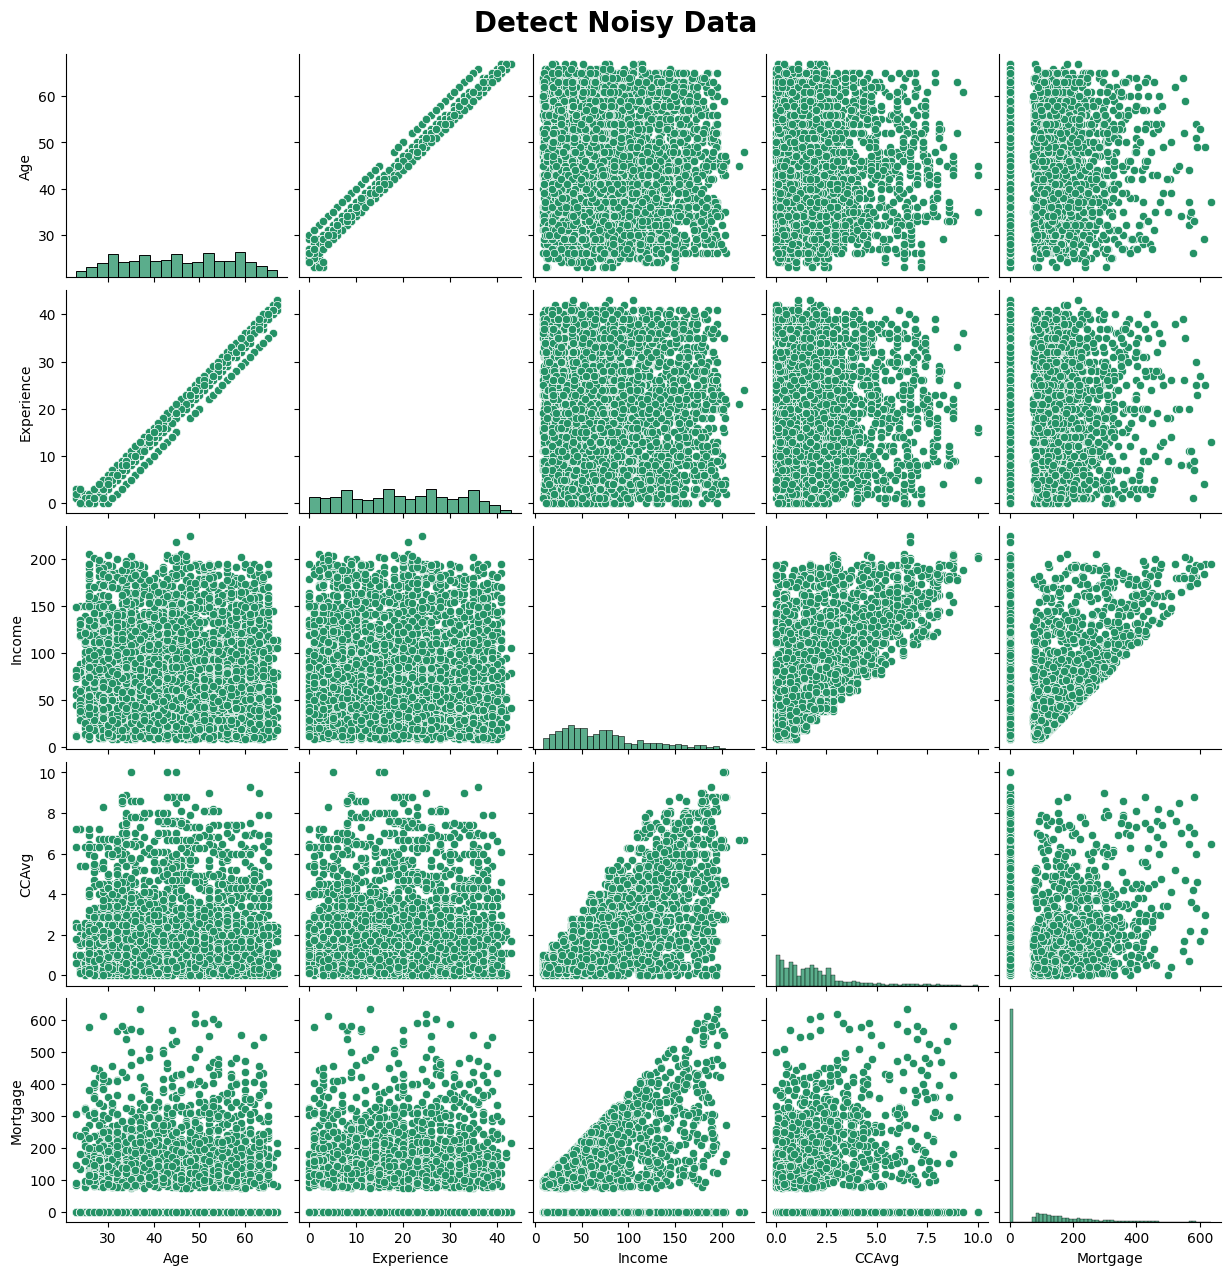

In [15]:
# check noisy data
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette('summer')
dnp = sns.pairplot(df.loc[:, ~df.columns.isin(discrete_cols1)])
# Define FONT with desired font properties
FONT = {'fontname':'default', 'fontsize':20, 'fontweight':'bold'} # Example font properties
dnp.fig.suptitle('Detect Noisy Data', y=1.02, **FONT)

plt.show()

In [16]:
# convert annual income to monthly with divide by 12
df['Income'] = round(df['Income']/12, 2)
df

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,4.08,4,1.6,1,0,0,1,0,0,0
1,45,19,2.83,3,1.5,1,0,0,1,0,0,0
2,39,15,0.92,1,1.0,1,0,0,0,0,0,0
3,35,9,8.33,1,2.7,2,0,0,0,0,0,0
4,35,8,3.75,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,3.33,1,1.9,3,0,0,0,0,1,0
4996,30,4,1.25,4,0.4,1,85,0,0,0,1,0
4997,63,39,2.00,2,0.3,3,0,0,0,0,0,0
4998,65,40,4.08,3,0.5,2,0,0,0,0,1,0


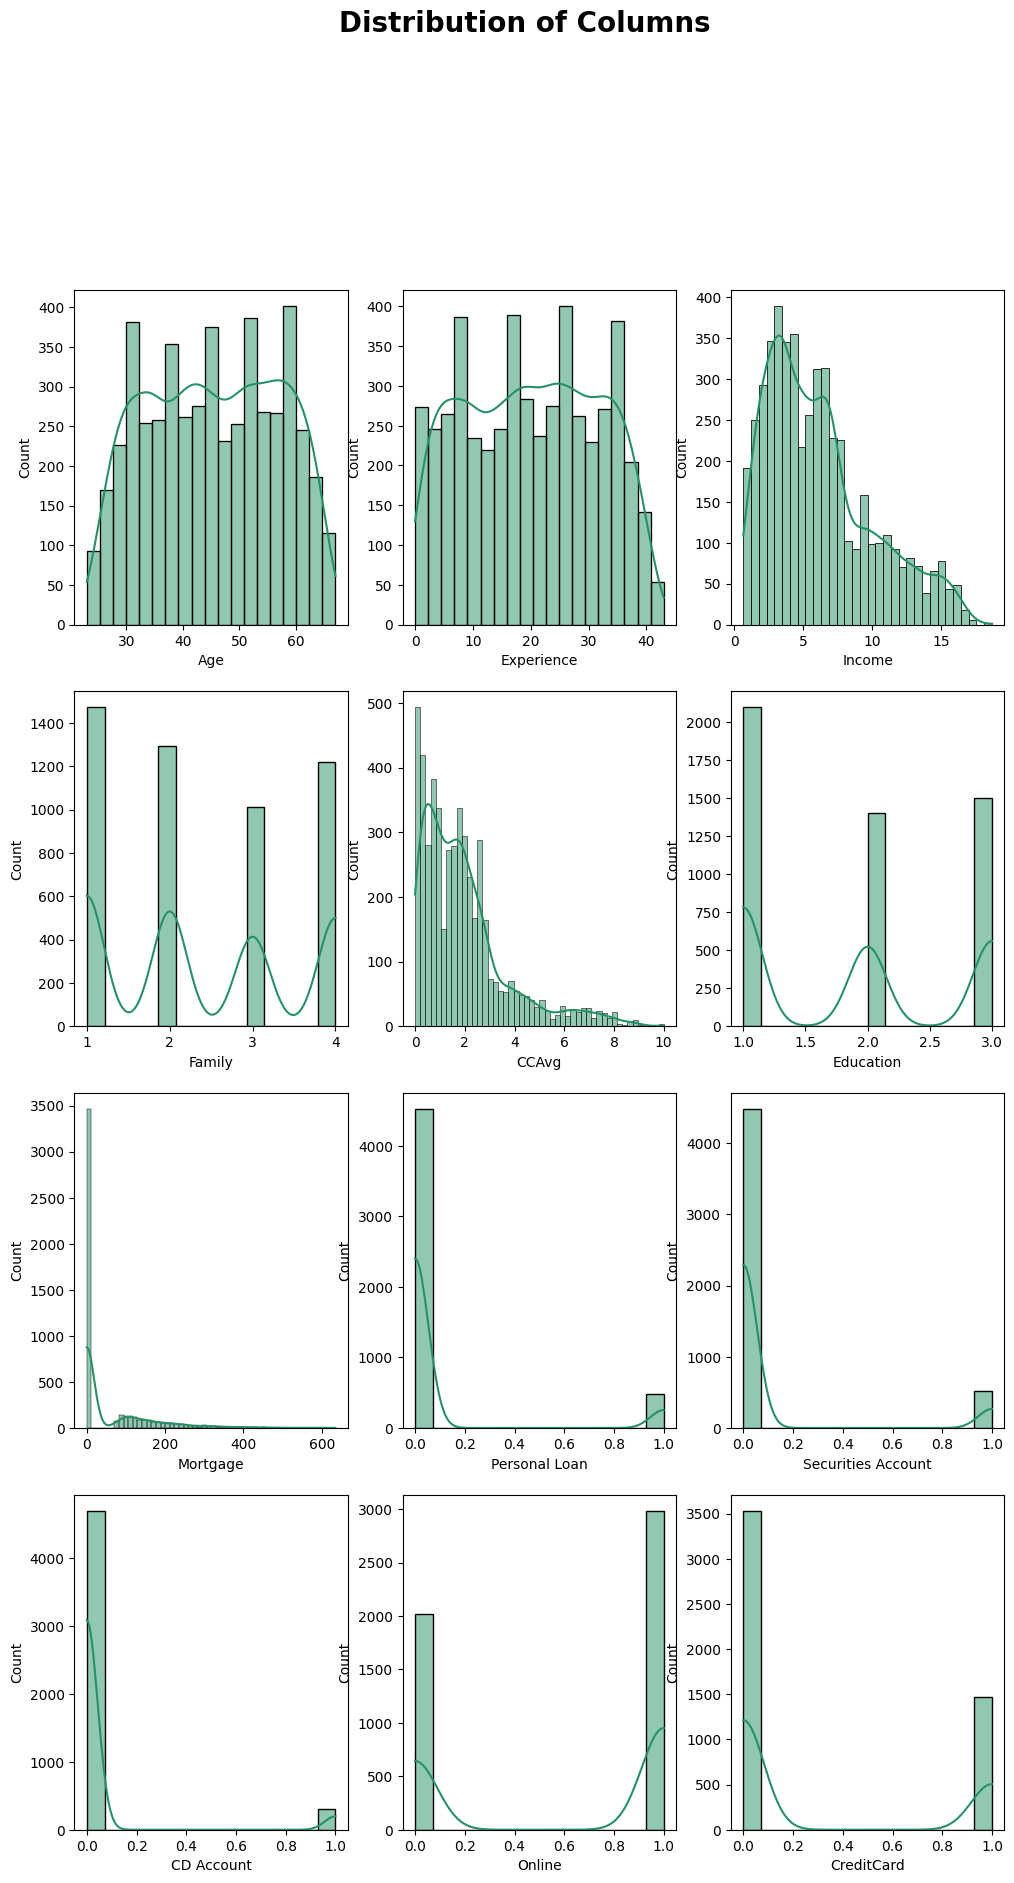

In [17]:
# check distribution Scatter matrix (splom) with go.Splom
sns.set_palette('summer')
fig, ax = plt.subplots(4,3,figsize=(12,20))
for i, col in enumerate(df):
    sns.histplot(df[col], kde=True, ax=ax[i//3, i%3])
fig.suptitle('Distribution of Columns', y=1.02, **FONT)
plt.show()

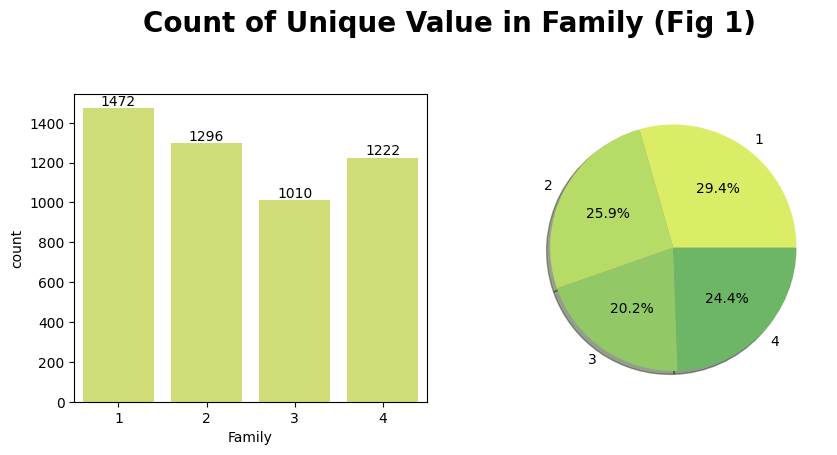

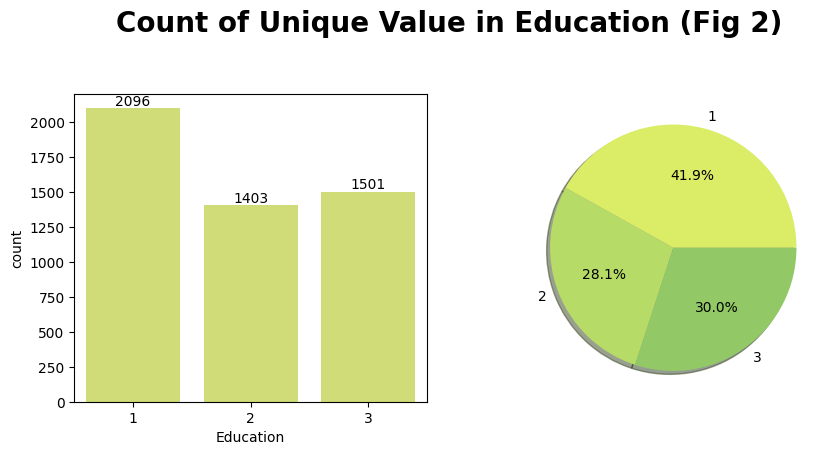

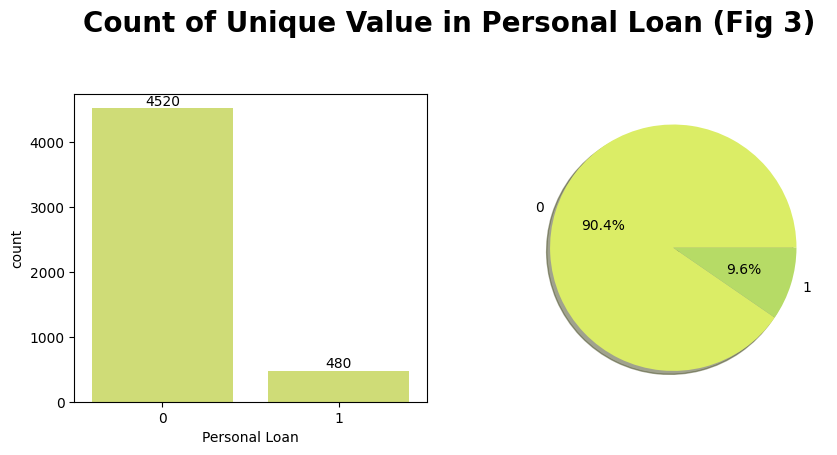

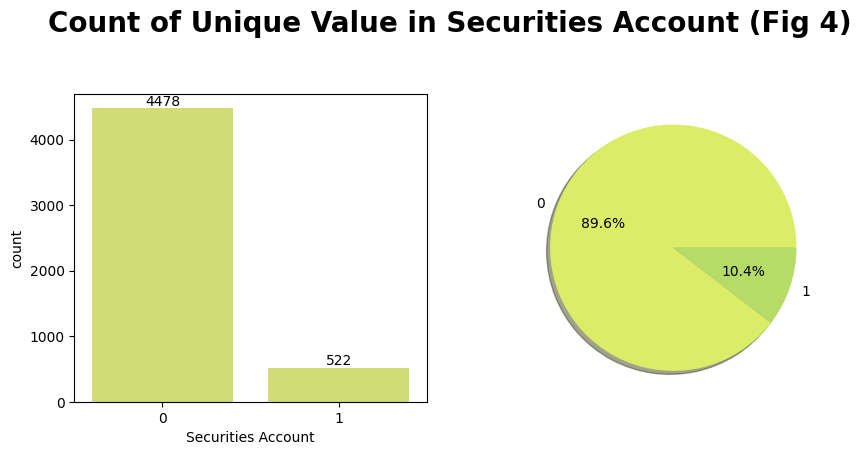

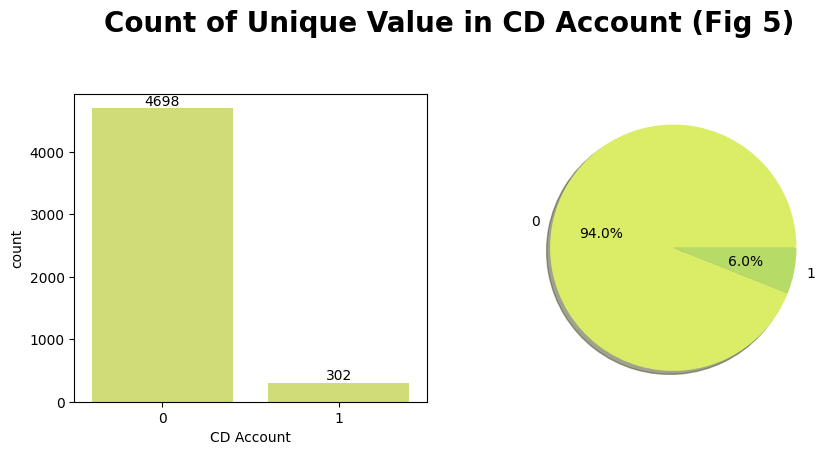

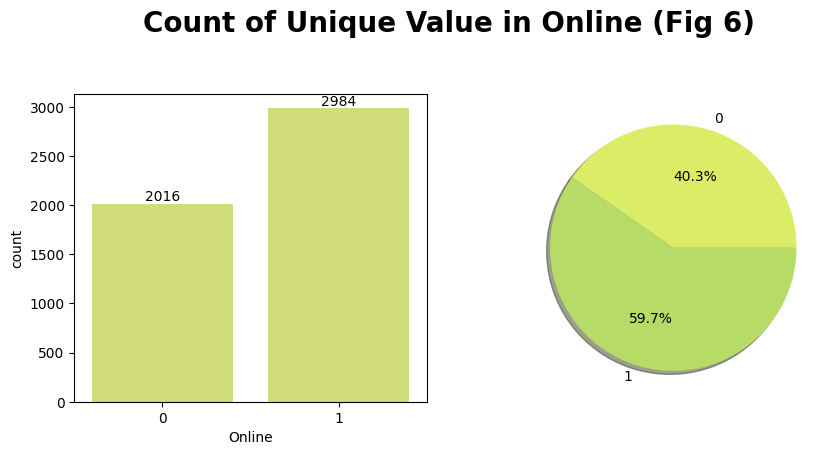

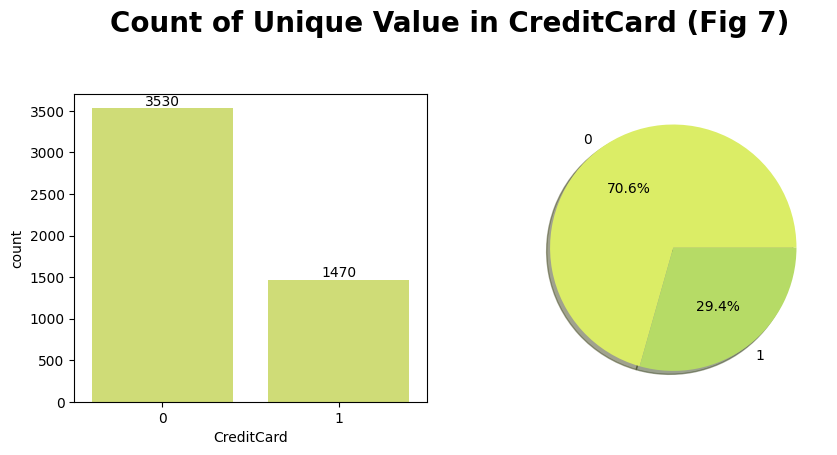

In [18]:
# univariate analysis of categorical data:
sns.set_palette("summer_r")
for i, col in enumerate(discrete_cols1):

    fig, axes = plt.subplots(1,2,figsize=(10,4))

    # count of col (countplot)
    sns.countplot(data=df, x=col, ax=axes[0])
    for container in axes[0].containers:
        axes[0].bar_label(container)
    # count of col (pie chart)
    slices = df[col].value_counts().sort_index().values
    activities = [var for var in df[col].value_counts().sort_index().index]
    axes[1].pie(slices, labels=activities, shadow=True, autopct='%1.1f%%')

    plt.suptitle(f'Count of Unique Value in {col} (Fig {i+1})', y=1.09, **FONT)
    plt.show()

In [19]:
# univariate analysis of numerical data:
df.loc[:, ~df.columns.isin(discrete_cols1)].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.00,35.00,45.00,55.00,67.00
Experience,5000.0,20.134600,11.415189,0.00,10.00,20.00,30.00,43.00
Income,5000.0,6.147912,3.836233,0.67,3.25,5.33,8.17,18.67
CCAvg,5000.0,1.937938,1.747659,0.00,0.70,1.50,2.50,10.00
Mortgage,5000.0,56.498800,101.713802,0.00,0.00,0.00,101.00,635.00


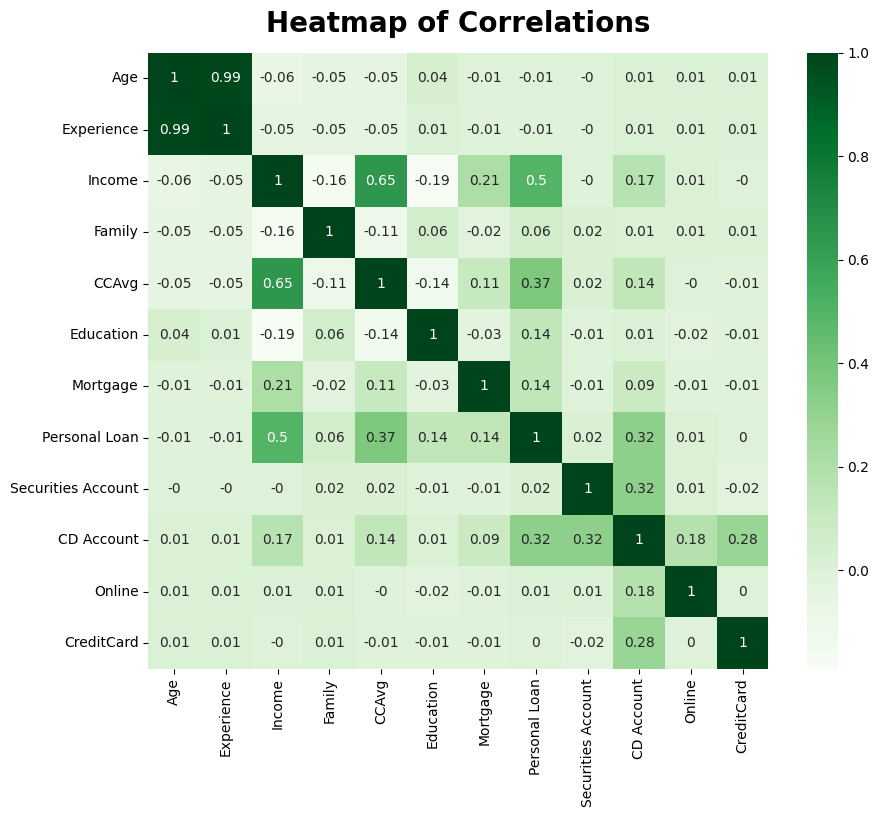

In [20]:
# draw heatplot of correlation between columns
plt.figure(figsize=(10,8))
sns.heatmap(round(df.corr(),2), cmap='Greens', annot=True)
plt.title('Heatmap of Correlations', y=1.02, fontdict=FONT)
plt.show()

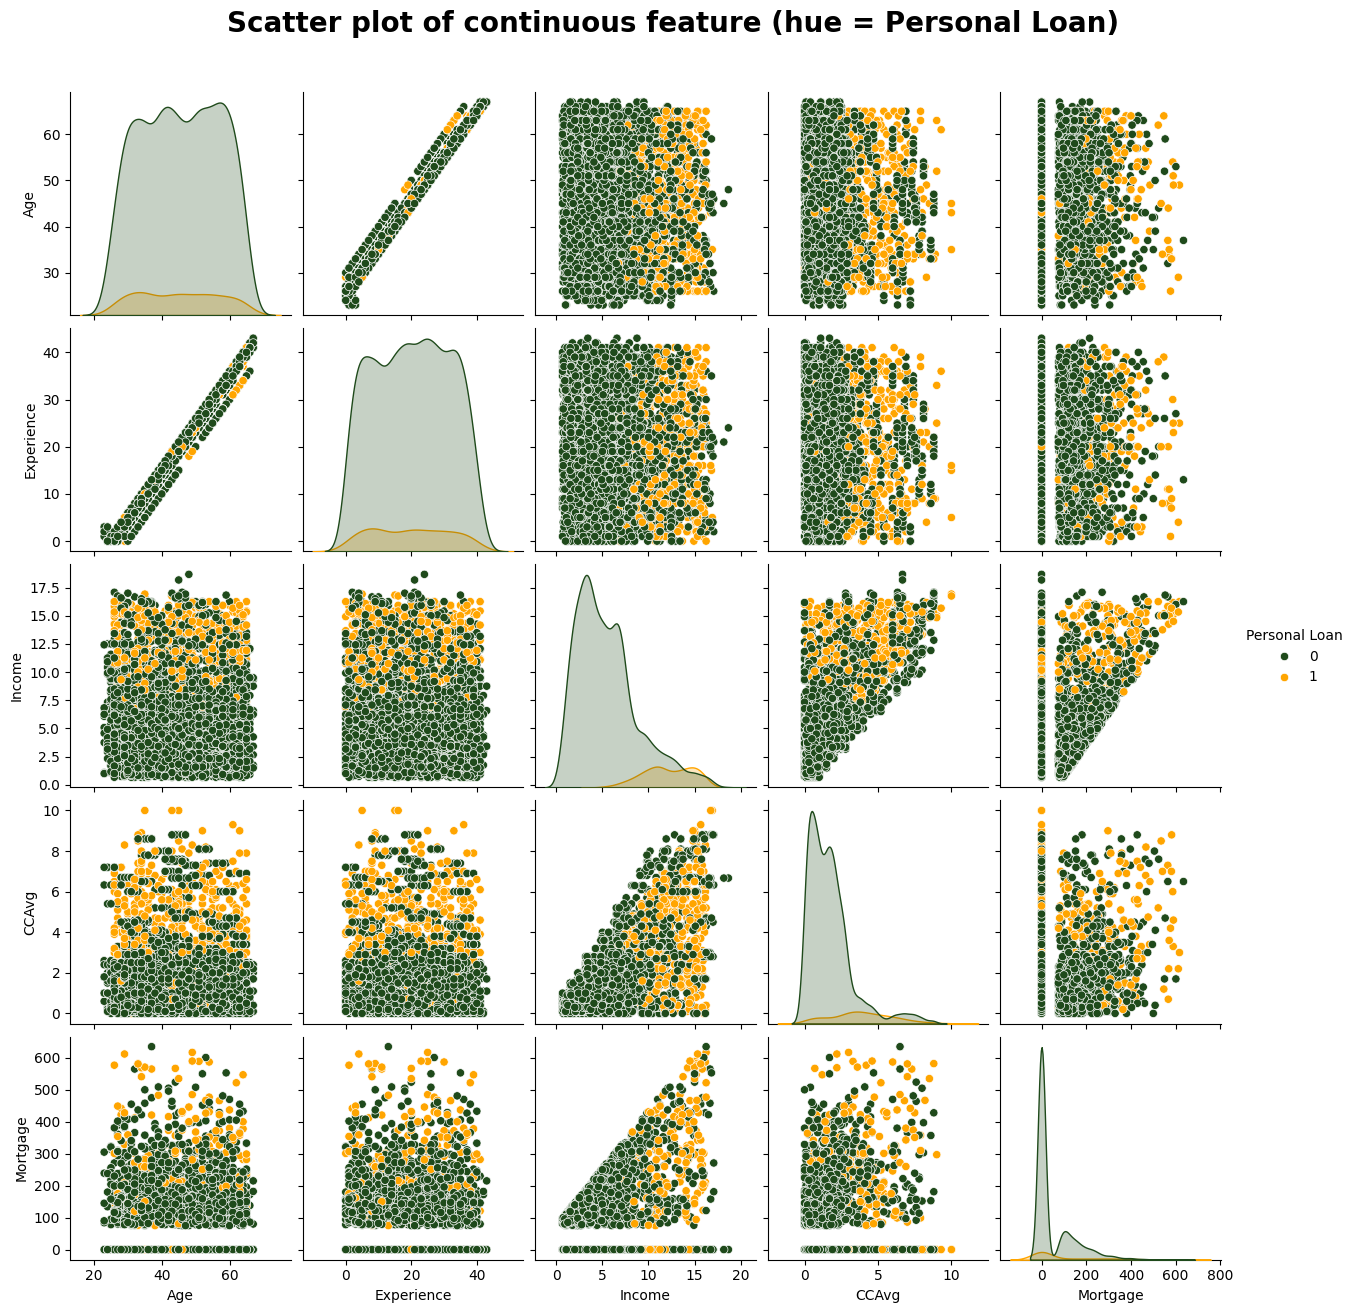

In [21]:
# draw pairplot with hue = Personal Loan
sns.set_palette(['#1f4a1b','orange','#bbff33','yellow'])
splot = sns.pairplot(data=df, x_vars=['Age','Experience','Income','CCAvg','Mortgage'], y_vars=['Age','Experience','Income','CCAvg','Mortgage'], hue='Personal Loan')
splot.fig.suptitle('Scatter plot of continuous feature (hue = Personal Loan)', y=1.05, **FONT)
plt.show()

# TRAIN

In [22]:
# Define X and y
X = df.drop('Personal Loan', axis=1)
y = df['Personal Loan'].values.reshape(-1, 1)

In [23]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
# ✅ Train (70%) - Validation (15%) - Test (15%) Split (with stratification)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

print(f"Train Set: {X_train.shape}, Validation Set: {X_val.shape}, Test Set: {X_test.shape}")

Train Set: (3500, 11), Validation Set: (750, 11), Test Set: (750, 11)


In [25]:
# Lists to store results
Model, FPR, TPR, ACC_test, ACC_train, Recall, Precision, F1, AUC = [], [], [], [], [], [], [], [], []
# Function to delete previous results
# Lists to store results
Model, FPR, TPR, ACC_test, ACC_train, Recall, Precision, F1, AUC = [], [], [], [], [], [], [], [], []
# Function to delete previous results
def delete_results():
    global FPR, TPR, ACC_test, ACC_train, Recall, Precision, F1, AUC
    del FPR[:], TPR[:], ACC_test[:], ACC_train[:], Recall[:], Precision[:], F1[:], AUC[:]

# Function to perform Stratified K-Fold Cross-Validation
def Perform_cross_val(model, k, X, y, scoring):
    skf = StratifiedKFold(n_splits=k) # This line should now work
    cv_results = cross_val_score(model, X, y.ravel(), cv=skf, scoring=scoring)
    print(f"CV for k={k}, scoring={scoring}")
    print(f"CV mean: {np.mean(cv_results):.4f}")
    print(f"CV results: {cv_results}\n")

# Function to evaluate models
def evaluate_model(model, X_train, X_val, y_train, y_val, model_name):
    model.fit(X_train, y_train.ravel())
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    y_proba_val = model.predict_proba(X_val)[:, 1]

    # Compute metrics
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_val = accuracy_score(y_val, y_pred_val)
    recall = recall_score(y_val, y_pred_val)
    precision = precision_score(y_val, y_pred_val)
    f1 = f1_score(y_val, y_pred_val)
    roc_auc = roc_auc_score(y_val, y_proba_val)

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_val, y_proba_val)

    # Store results
    Model.append(model_name)
    FPR.append(fpr)
    TPR.append(tpr)
    ACC_test.append(acc_val)
    ACC_train.append(acc_train)
    Recall.append(recall)
    Precision.append(precision)
    F1.append(f1)
    AUC.append(roc_auc)

    # Print metrics
    print(f"\n🔹 Model: {model_name}")
    print(f"✅ Accuracy (Train): {acc_train:.4f}")
    print(f"✅ Accuracy (Validation): {acc_val:.4f}")
    print(f"📌 Recall: {recall:.4f}")
    print(f"📌 Precision: {precision:.4f}")
    print(f"📌 F1-score: {f1:.4f}")
    print(f"📌 AUC Score: {roc_auc:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_val, y_pred_val)
    print("\n📊 Confusion Matrix:\n", cm)
    print("\n📝 Classification Report:\n", classification_report(y_val, y_pred_val))

    return model

In [26]:
# Function to plot results
def plot_results():
    fig1 = go.Figure()

    # ROC Curve
    fig1.add_shape(type='line', line=dict(color='green', dash='dash'), x0=0, x1=1, y0=0, y1=1)
    for fpr, tpr, auc, name in zip(FPR, TPR, AUC, Model):
        fig1.add_trace(go.Scatter(x=fpr, y=tpr, name=f"{name} AUC = {auc:.4f}", mode='lines'))

    fig1.update_layout(title="ROC Curve & AUC Score", xaxis_title="False Positive Rate", yaxis_title="True Positive Rate")
    fig1.show()

    # Accuracy, Recall, Precision, F1-score
    fig2 = go.Figure()
    fig2.add_trace(go.Bar(x=Model, y=ACC_test, name="Accuracy (Validation)"))
    fig2.add_trace(go.Bar(x=Model, y=Recall, name="Recall"))
    fig2.add_trace(go.Bar(x=Model, y=Precision, name="Precision"))
    fig2.add_trace(go.Bar(x=Model, y=F1, name="F1 Score"))

    fig2.update_layout(title="Model Evaluation Metrics", barmode="group")
    fig2.show()


In [27]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold # Import StratifiedKFold
from sklearn.model_selection import cross_val_score # Import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score, roc_curve
import plotly.graph_objects as go # Import plotly.graph_objects for plotting

In [28]:
from sklearn.model_selection import train_test_split, GridSearchCV

# Perform Stratified K-Fold Cross-Validation
print("\n🔍 Cross-Validation Results:")
svm_rbf = SVC(kernel='rbf', C=10, gamma=0.1, probability=True)
svm_linear = SVC(kernel='linear', C=1, probability=True)
logistic_regression = LogisticRegression(max_iter=500)

models = {
    "SVM (RBF Kernel)": svm_rbf,
    "SVM (Linear Kernel)": svm_linear,
    "Logistic Regression": logistic_regression
}

for name, model in models.items():
    Perform_cross_val(model, 10, X_train, y_train, scoring="accuracy")

# Train and evaluate models
delete_results()

print("\n🚀 Training Models:")
svm_rbf = evaluate_model(svm_rbf, X_train, X_val, y_train, y_val, "SVM (RBF Kernel)")
svm_linear = evaluate_model(svm_linear, X_train, X_val, y_train, y_val, "SVM (Linear Kernel)")
logistic_regression = evaluate_model(logistic_regression, X_train, X_val, y_train, y_val, "Logistic Regression")

# Plot Results
plot_results()


🔍 Cross-Validation Results:
CV for k=10, scoring=accuracy
CV mean: 0.9757
CV results: [0.96       0.96285714 0.98857143 0.98571429 0.97714286 0.98
 0.97142857 0.98571429 0.97428571 0.97142857]

CV for k=10, scoring=accuracy
CV mean: 0.9503
CV results: [0.94285714 0.93142857 0.94857143 0.95428571 0.95714286 0.96
 0.94       0.96       0.96       0.94857143]

CV for k=10, scoring=accuracy
CV mean: 0.9517
CV results: [0.94       0.93142857 0.96       0.95428571 0.96285714 0.96285714
 0.94571429 0.96285714 0.96       0.93714286]


🚀 Training Models:

🔹 Model: SVM (RBF Kernel)
✅ Accuracy (Train): 0.9911
✅ Accuracy (Validation): 0.9853
📌 Recall: 0.8750
📌 Precision: 0.9692
📌 F1-score: 0.9197
📌 AUC Score: 0.9974

📊 Confusion Matrix:
 [[676   2]
 [  9  63]]

📝 Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       678
           1       0.97      0.88      0.92        72

    accuracy                           0.99      

In [29]:
# Function to make a prediction on a new customer sample
def test_prediction(model, scaler):
    print("\n🔮 **Testing Sample Prediction**")

    # Sample User Input
    sample_input = {
        "Age": 42,
        "Experience": 16,
        "Income": 2.5,
        "Family": 3,
        "CCAvg": 1.2,
        "Education": 3,
        "Mortgage": 0,
        "Securities Account": 1,
        "CD Account": 0,
        "Online": 1,
        "CreditCard": 1
    }

    # Convert sample into a dataframe
    sample_df = pd.DataFrame([sample_input])

    # Scale the input data
    sample_scaled = scaler.transform(sample_df)

    # Make prediction
    prediction = model.predict(sample_scaled)[0]
    probability = model.predict_proba(sample_scaled)[0][1]  # Probability of accepting the loan

    # Print the result
    print(f"\n📌 **Model Prediction:** {'Accepted ✅' if prediction == 1 else 'Not Accepted ❌'}")
    print(f"📌 **Probability of Acceptance:** {probability:.4f}")

# Select the best model based on validation accuracy
best_model = max([(ACC_test[i], model) for i, model in enumerate([svm_rbf, svm_linear, logistic_regression])], key=lambda x: x[0])[1]

# Test sample prediction
test_prediction(best_model, scaler)



🔮 **Testing Sample Prediction**

📌 **Model Prediction:** Not Accepted ❌
📌 **Probability of Acceptance:** 0.0013


In [30]:
# Define the sample data
sample = pd.DataFrame({
    'Age': [42],
    'Experience': [16],
    'Income': [12/12],  # Converted to monthly income
    'Family': [2],
    'CCAvg': [4.7],
    'Education': [1],
    'Mortgage': [3],
    'Securities Account': [1],
    'CD Account': [1],
    'Online': [0],
    'CreditCard': [3]
})

# Print the input sample values
print("\n🔍 **Sample Customer Information**")
for col in sample.columns:
    print(f"{col}: {sample[col].values[0]}")

# Scale the sample input using the same scaler from training
sample_scaled = scaler.transform(sample)

# Select the best model based on validation accuracy
best_model = max([(ACC_test[i], model) for i, model in enumerate([svm_rbf, svm_linear, logistic_regression])], key=lambda x: x[0])[1]

# Predict loan acceptance
result = best_model.predict(sample_scaled)[0]
probability = best_model.predict_proba(sample_scaled)[0][1]  # Probability of accepting the loan

# Print Prediction Result
print("="*50)
print(f"🔮 **Prediction:** {'Accepted ✅' if result == 1 else 'Not Accepted ❌'}")
print(f"📊 **Probability of Acceptance:** {probability:.4f}")
print("="*50)



🔍 **Sample Customer Information**
Age: 42
Experience: 16
Income: 1.0
Family: 2
CCAvg: 4.7
Education: 1
Mortgage: 3
Securities Account: 1
CD Account: 1
Online: 0
CreditCard: 3
🔮 **Prediction:** Not Accepted ❌
📊 **Probability of Acceptance:** 0.3398


In [31]:
# Define an adjusted sample data to increase loan acceptance probability
sample = pd.DataFrame({
    'Age': [35],  # Slightly younger, more likely to take loans
    'Experience': [12],
    'Income': [15],  # Increased income (was 2.5)
    'Family': [2],
    'CCAvg': [5.0],  # Increased credit card average spending
    'Education': [3],  # Higher education level
    'Mortgage': [0],  # No mortgage
    'Securities Account': [1],  # Has a securities account
    'CD Account': [1],  # Has a certificate of deposit account
    'Online': [1],  # Uses online banking
    'CreditCard': [1]  # Has a credit card
})

# Print the input sample values
print("\n🔍 **Sample Customer Information (Optimized for Loan Acceptance)**")
for col in sample.columns:
    print(f"{col}: {sample[col].values[0]}")

# Scale the sample input using the same scaler from training
sample_scaled = scaler.transform(sample)

# Select the best model based on validation accuracy
best_model = max([(ACC_test[i], model) for i, model in enumerate([svm_rbf, svm_linear, logistic_regression])], key=lambda x: x[0])[1]

# Predict loan acceptance
result = best_model.predict(sample_scaled)[0]
probability = best_model.predict_proba(sample_scaled)[0][1]  # Probability of accepting the loan

# Print Prediction Result
print("="*50)
print(f"🔮 **Prediction:** {'Accepted ✅' if result == 1 else 'Not Accepted ❌'}")
print(f"📊 **Probability of Acceptance:** {probability:.4f}")
print("="*50)



🔍 **Sample Customer Information (Optimized for Loan Acceptance)**
Age: 35
Experience: 12
Income: 15
Family: 2
CCAvg: 5.0
Education: 3
Mortgage: 0
Securities Account: 1
CD Account: 1
Online: 1
CreditCard: 1
🔮 **Prediction:** Accepted ✅
📊 **Probability of Acceptance:** 0.9922


In [32]:
# Function to ask questions interactively
def get_user_input():
    print("\n💬 **Answer the following questions to check loan acceptance:**\n")

    # Collect user inputs for numeric attributes
    age = int(input("📌 Enter your age: "))
    experience = int(input("📌 Enter your years of experience: "))
    income = float(input("📌 Enter your monthly income (in thousands): "))
    family = int(input("📌 Enter number of family members (1-4): "))
    ccavg = float(input("📌 Enter your average monthly credit card spending: "))
    education = int(input("📌 Enter your education level (1 = Undergraduate, 2 = Graduate, 3 = Advanced/Professional): "))
    mortgage = float(input("📌 Enter your mortgage amount (Enter 0 if none): "))

    # Binary attributes: Yes/No questions automatically mapped to 0/1
    securities_account = int(input("📌 Do you have a securities account? (Yes = 1, No = 0): "))
    cd_account = int(input("📌 Do you have a certificate of deposit (CD) account? (Yes = 1, No = 0): "))
    online = int(input("📌 Do you use online banking? (Yes = 1, No = 0): "))
    credit_card = int(input("📌 Do you have a credit card with the bank? (Yes = 1, No = 0): "))

    # Create DataFrame with user input
    sample = pd.DataFrame({
        'Age': [age],
        'Experience': [experience],
        'Income': [income],
        'Family': [family],
        'CCAvg': [ccavg],
        'Education': [education],
        'Mortgage': [mortgage],
        'Securities Account': [securities_account],
        'CD Account': [cd_account],
        'Online': [online],
        'CreditCard': [credit_card]
    })

    return sample

# Function to predict loan acceptance
def predict_loan_acceptance(model, scaler):
    sample = get_user_input()

    # Print entered details
    print("\n🔍 **Your Entered Information:**")
    for col in sample.columns:
        print(f"{col}: {sample[col].values[0]}")

    # Scale the sample input
    sample_scaled = scaler.transform(sample)

    # Predict loan acceptance
    result = model.predict(sample_scaled)[0]
    probability = model.predict_proba(sample_scaled)[0][1]  # Probability of accepting the loan

    # Print Prediction Result
    print("\n" + "="*50)
    print(f"🔮 **Prediction:** {'Accepted ✅' if result == 1 else 'Not Accepted ❌'}")
    print(f"📊 **Probability of Acceptance:** {probability:.4f}")
    print("="*50)

# Select the best model based on validation accuracy
best_model = max([(ACC_test[i], model) for i, model in enumerate([svm_rbf, svm_linear, logistic_regression])], key=lambda x: x[0])[1]

# Run the prediction function
predict_loan_acceptance(best_model, scaler)



💬 **Answer the following questions to check loan acceptance:**

📌 Enter your age: 27
📌 Enter your years of experience: 5
📌 Enter your monthly income (in thousands): 8
📌 Enter number of family members (1-4): 1
📌 Enter your average monthly credit card spending: 0
📌 Enter your education level (1 = Undergraduate, 2 = Graduate, 3 = Advanced/Professional): 2
📌 Enter your mortgage amount (Enter 0 if none): 0
📌 Do you have a securities account? (Yes = 1, No = 0): 1
📌 Do you have a certificate of deposit (CD) account? (Yes = 1, No = 0): 1
📌 Do you use online banking? (Yes = 1, No = 0): 1
📌 Do you have a credit card with the bank? (Yes = 1, No = 0): 0

🔍 **Your Entered Information:**
Age: 27
Experience: 5
Income: 8.0
Family: 1
CCAvg: 0.0
Education: 2
Mortgage: 0.0
Securities Account: 1
CD Account: 1
Online: 1
CreditCard: 0

🔮 **Prediction:** Accepted ✅
📊 **Probability of Acceptance:** 0.6411


In [33]:
# Function to ask questions interactively
def get_user_input():
    print("\n💬 **Answer the following questions to check loan acceptance:**\n")

    # Collect user inputs for numeric attributes
    age = int(input("📌 Enter your age: "))
    experience = int(input("📌 Enter your years of experience: "))
    income = float(input("📌 Enter your monthly income (in thousands): "))
    family = int(input("📌 Enter number of family members (1-4): "))
    ccavg = float(input("📌 Enter your average monthly credit card spending: "))
    education = int(input("📌 Enter your education level (1 = Undergraduate, 2 = Graduate, 3 = Advanced/Professional): "))
    mortgage = float(input("📌 Enter your mortgage amount (Enter 0 if none): "))

    # Binary attributes: Yes/No questions automatically mapped to 0/1
    securities_account = int(input("📌 Do you have a securities account? (Yes = 1, No = 0): "))
    cd_account = int(input("📌 Do you have a certificate of deposit (CD) account? (Yes = 1, No = 0): "))
    online = int(input("📌 Do you use online banking? (Yes = 1, No = 0): "))
    credit_card = int(input("📌 Do you have a credit card with the bank? (Yes = 1, No = 0): "))

    # Create DataFrame with user input
    sample = pd.DataFrame({
        'Age': [age],
        'Experience': [experience],
        'Income': [income],
        'Family': [family],
        'CCAvg': [ccavg],
        'Education': [education],
        'Mortgage': [mortgage],
        'Securities Account': [securities_account],
        'CD Account': [cd_account],
        'Online': [online],
        'CreditCard': [credit_card]
    })

    return sample

# Function to predict loan acceptance
def predict_loan_acceptance(model, scaler):
    sample = get_user_input()

    # Print entered details
    print("\n🔍 **Your Entered Information:**")
    for col in sample.columns:
        print(f"{col}: {sample[col].values[0]}")

    # Scale the sample input
    sample_scaled = scaler.transform(sample)

    # Predict loan acceptance
    result = model.predict(sample_scaled)[0]
    probability = model.predict_proba(sample_scaled)[0][1]  # Probability of accepting the loan

    # Print Prediction Result
    print("\n" + "="*50)
    print(f"🔮 **Prediction:** {'Accepted ✅' if result == 1 else 'Not Accepted ❌'}")
    print(f"📊 **Probability of Acceptance:** {probability:.4f}")
    print("="*50)

# Select the best model based on validation accuracy
best_model = max([(ACC_test[i], model) for i, model in enumerate([svm_rbf, svm_linear, logistic_regression])], key=lambda x: x[0])[1]

# Run the prediction function
predict_loan_acceptance(best_model, scaler)



💬 **Answer the following questions to check loan acceptance:**

📌 Enter your age: 35
📌 Enter your years of experience: 12
📌 Enter your monthly income (in thousands): 15
📌 Enter number of family members (1-4): 2
📌 Enter your average monthly credit card spending: 5
📌 Enter your education level (1 = Undergraduate, 2 = Graduate, 3 = Advanced/Professional): 3
📌 Enter your mortgage amount (Enter 0 if none): 0
📌 Do you have a securities account? (Yes = 1, No = 0): 1
📌 Do you have a certificate of deposit (CD) account? (Yes = 1, No = 0): 1
📌 Do you use online banking? (Yes = 1, No = 0): 1
📌 Do you have a credit card with the bank? (Yes = 1, No = 0): 1

🔍 **Your Entered Information:**
Age: 35
Experience: 12
Income: 15.0
Family: 2
CCAvg: 5.0
Education: 3
Mortgage: 0.0
Securities Account: 1
CD Account: 1
Online: 1
CreditCard: 1

🔮 **Prediction:** Accepted ✅
📊 **Probability of Acceptance:** 0.9922


SVM (RBF Kernel) was the best performing model

In [34]:
print(f"\n🎯 **Best Model Selected for Prediction:** {best_model}")



🎯 **Best Model Selected for Prediction:** SVC(C=10, gamma=0.1, probability=True)



🔍 **Final Model Performance on Train, Validation, and Test Sets**

📌 **Train Accuracy:** 0.9911
📌 **Validation Accuracy:** 0.9853
📌 **Test Accuracy:** 0.9733
📌 **Test Recall:** 0.8472
📌 **Test Precision:** 0.8714
📌 **Test F1 Score:** 0.8592
📌 **Test AUC Score:** 0.9887

📊 **Confusion Matrix on Test Set:**
 [[669   9]
 [ 11  61]]


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.



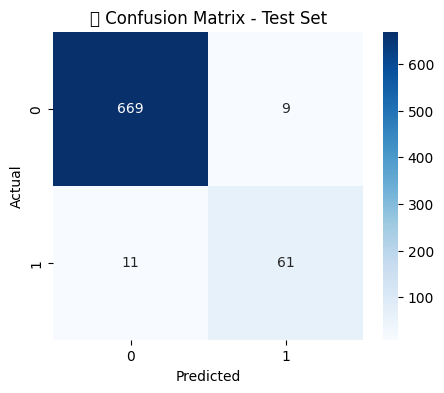

In [35]:
# Function to evaluate the best model on the test set
def evaluate_on_test(model, X_train, X_val, X_test, y_train, y_val, y_test):
    print("\n🔍 **Final Model Performance on Train, Validation, and Test Sets**\n")

    # Train Set Accuracy
    y_train_pred = model.predict(X_train)
    acc_train = accuracy_score(y_train, y_train_pred)

    # Validation Set Accuracy
    y_val_pred = model.predict(X_val)
    acc_val = accuracy_score(y_val, y_val_pred)

    # Test Set Predictions
    y_test_pred = model.predict(X_test)
    y_proba_test = model.predict_proba(X_test)[:, 1]  # Get probability estimates

    # Test Set Performance Metrics
    acc_test = accuracy_score(y_test, y_test_pred)
    recall_test = recall_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred)
    auc_test = roc_auc_score(y_test, y_proba_test)

    # Print Metrics
    print(f"📌 **Train Accuracy:** {acc_train:.4f}")
    print(f"📌 **Validation Accuracy:** {acc_val:.4f}")
    print(f"📌 **Test Accuracy:** {acc_test:.4f}")
    print(f"📌 **Test Recall:** {recall_test:.4f}")
    print(f"📌 **Test Precision:** {precision_test:.4f}")
    print(f"📌 **Test F1 Score:** {f1_test:.4f}")
    print(f"📌 **Test AUC Score:** {auc_test:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_test_pred)
    print("\n📊 **Confusion Matrix on Test Set:**\n", cm)

    # Plot Confusion Matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
    plt.title("📉 Confusion Matrix - Test Set")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Run evaluation on test set
evaluate_on_test(best_model, X_train, X_val, X_test, y_train, y_val, y_test)
